In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb
from astropy import constants as const
import random
import astropy.constants as const
import math
from tqdm import tqdm
import extinction as ex
import pdb
import glob
import scipy.optimize as optimization
import scipy.interpolate as sinterp
from sklearn import preprocessing 
from pynverse import inversefunc

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def gaussian(x, mu, sigma):
    g = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1/2)*(x-mu)**2/sigma)
    return g

In [3]:
def cdf(g, dx):
    cdf = np.cumsum(g) * dx
    return cdf

In [4]:
x = np.linspace(0, 10, 10000)
dx = x[1]-x[0]
g = gaussian(x, 5, 1)
n = g / np.trapz(g, x=x)
c = cdf(n, dx)
inv = sinterp.interp1d(c, x, fill_value='extrapolate')

In [5]:
np.trapz(n, x=x)

1.0000000000000002

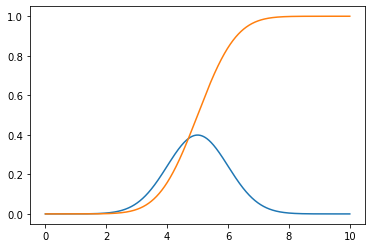

In [6]:
plt.plot(x,g)
plt.plot(x,c)

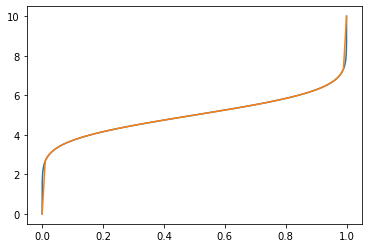

In [7]:
plt.plot(c,x)
plt.plot(np.linspace(0,1,100), inv(np.linspace(0,1,100)))
#plt.xlim(0,1) 

In [8]:
print(x)

[0.00000000e+00 1.00010001e-03 2.00020002e-03 ... 9.99799980e+00
 9.99899990e+00 1.00000000e+01]


In [9]:
random.uniform(0,1)

0.18634426849446362

In [10]:
inv(random.uniform(0,1))

array(5.17566108)

In [11]:
numMC = 5000
its = np.zeros(numMC)
for i in range(numMC):
    its[i] = inv(random.random())

In [12]:
np.mean(its)

5.012807635607917

In [13]:
np.std(its)

1.0126844097984609

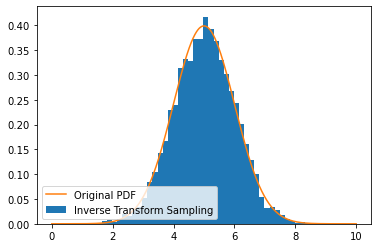

In [14]:
plt.hist(its, bins=50, density=True, label='Inverse Transform Sampling')
plt.plot(x,g, label='Original PDF')
plt.legend(loc='lower left')

In [292]:
def inverse_transform_sampling(x, f, nsamples):
    '''
    This function performs the inverse transform sampling method to sample from a probability distribution 
    function (PDF) using uniform samples between 0 and 1. It does this by calculating the cumulative distribution 
    function (CDF) of the normalized PDF, inverting it, then sampling along the probability axis from 0 to 1.
    
    Inputs:
    x (array-like) - the x-values used to generate f
    f (array-like) - the PDF
    nsamples (int) - the number of inverse transform sampled values needed, i.e. the size of the output
    
    Outputs:
    samples (array-like) - an inverse transform sampled distribution which resembles the PDF
    '''
    
    dx = x[1]-x[0]
    normalized = f / np.trapz(f, x=x, dx=dx)
    c = cdf(normalized, dx)
    inv = sinterp.interp1d(c, x, fill_value='extrapolate')
    r = np.random.rand(nsamples)
    samples = inv(r)
    samples = samples[np.isfinite(samples)]
    
    return np.array(samples)

In [16]:
np.random.uniform?

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

.. note::
    New code should use the ``uniform`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than or equal to high.  The default value is 1.0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is r

In [17]:
np.random.rand?

Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      builtin_function_or_method


In [18]:
i = inverse_transform_sampling(x, g, len(g))
i

array([6.42900478, 4.69835846, 3.81231078, ..., 5.99230716, 6.70159468,
       5.02222441])

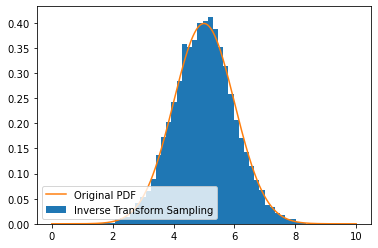

In [19]:
plt.hist(i, bins=50, density=True, label='Inverse Transform Sampling')
plt.plot(x,g, label='Original PDF')
plt.legend(loc='lower left')

In [20]:
x = np.linspace(0, 10, 10000)
dx = x[1]-x[0]
g1 = gaussian(x, 0.5, 1)
n1 = g1 / np.trapz(g1, x=x)
c1 = cdf(n1, dx)
#inv1 = sinterp.interp1d(c1, x)
inv1 = sinterp.interp1d(c1, x, fill_value='extrapolate')
#p = np.polyfit(c1, x, 2)
#inv1 = np.poly1d(p)

In [21]:
np.trapz(n1, x=x)

1.0

In [22]:
#sinterp.interp1d?

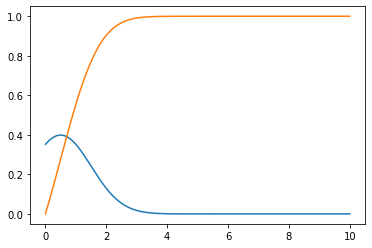

In [23]:
plt.plot(x,g1)
plt.plot(x,c1)

(0.0, 1.0)

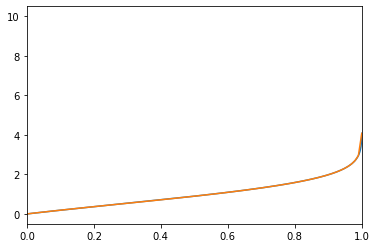

In [24]:
plt.plot(c1,x)
plt.plot(np.linspace(0,1,100), inv1(np.linspace(0,1,100)))
plt.xlim(0,1)

In [25]:
inv1(random.uniform(0,1))

array(2.05657772)

In [26]:
r = np.random.rand(100)
synthetic_pdf = inv1(r)

In [27]:
numMC = 5000
its1 = np.zeros(numMC)
for i in range(numMC):
    #pdb.set_trace()
    its1[i] = inv1(random.uniform(0,1))

In [28]:
np.trapz(its1)

5109.420720956542

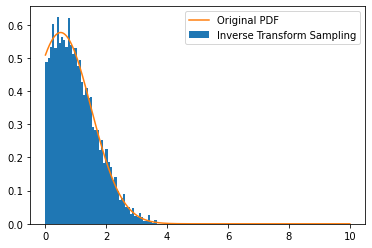

In [29]:
plt.hist(its1, bins=50, density=True, label='Inverse Transform Sampling')
plt.plot(x,n1, label='Original PDF')
plt.legend(loc='upper right')

In [30]:
def exponential(x, mu, beta):
    f = (1/beta)*np.exp(-(x-mu)/beta)
    return f

In [31]:
x = np.linspace(0,10, 1000)
expo = exponential(x, 0, 1)
dx = x[1]-x[0]
ne = expo / np.trapz(expo, x=x)
ce = cdf(ne, dx)
#inv1 = sinterp.interp1d(c1, x)
inve = sinterp.interp1d(ce, x, fill_value='extrapolate')
#p = np.polyfit(c1, x, 2)
#inv1 = np.poly1d(p)

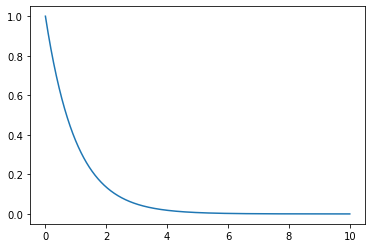

In [32]:
plt.plot(x, expo)

(0.0, 1.0)

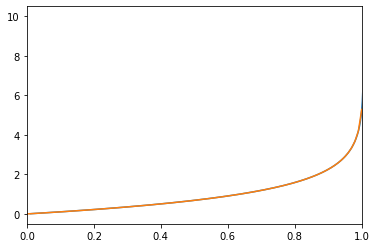

In [33]:
plt.plot(ce,x)
plt.plot(np.linspace(0,1,100), inve(np.linspace(0,1,100)))
plt.xlim(0,1)

In [34]:
numMC = 5000
itse = np.zeros(numMC)
for i in range(numMC):
    #pdb.set_trace()
    itse[i] = inve(random.uniform(0,1))

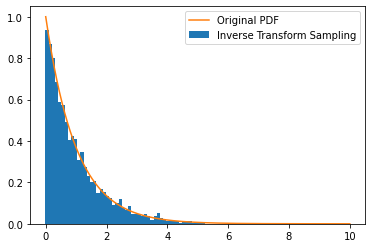

In [35]:
plt.hist(itse, bins=50, density=True, label='Inverse Transform Sampling')
plt.plot(x,ne, label='Original PDF')
plt.legend(loc='upper right')

In [36]:
e = inverse_transform_sampling(x, expo, 5000)

ValueError: A value in x_new is below the interpolation range.

In [37]:
np.trapz(exp, x = np.linspace(0,10, 1000))

NameError: name 'exp' is not defined

In [38]:
e = inverse_transform_sampling(x, exp, 5000)

NameError: name 'exp' is not defined

In [21]:
x = np.linspace(0,10, 1000)
tophat = np.zeros(1000)
tophat[250:750] = 1

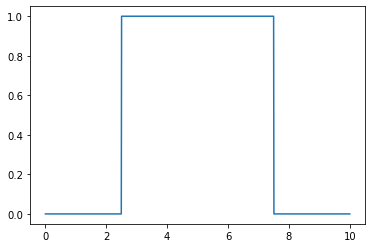

In [22]:
plt.plot(x, tophat)

In [23]:
inv2 = inverse_transform_sampling(x, tophat, 5000)

(array([0.00141436, 0.00424307, 0.00141436, 0.00282872, 0.00565743,
        0.        , 0.18245212, 0.21498235, 0.21215363, 0.20225313,
        0.19518134, 0.22063978, 0.20791056, 0.19093827, 0.19093827,
        0.18810955, 0.18386648, 0.17113726, 0.25317   , 0.19801006,
        0.23195464, 0.19093827, 0.20932492, 0.20508184, 0.18528084,
        0.20083877, 0.2163967 , 0.21356799, 0.1866952 , 0.20932492,
        0.21922542, 0.17113726, 0.19093827, 0.21215363, 0.19376698,
        0.19801006, 0.20225313, 0.19801006, 0.20508184, 0.17396598,
        0.17113726, 0.04384508, 0.        , 0.00141436, 0.00141436,
        0.00424307, 0.        , 0.00282872, 0.00141436, 0.00424307]),
 array([1.65089964, 1.7923066 , 1.93371356, 2.07512052, 2.21652748,
        2.35793444, 2.4993414 , 2.64074836, 2.78215532, 2.92356228,
        3.06496924, 3.2063762 , 3.34778316, 3.48919012, 3.63059708,
        3.77200404, 3.913411  , 4.05481796, 4.19622492, 4.33763188,
        4.47903884, 4.6204458 , 4.76185276, 4.

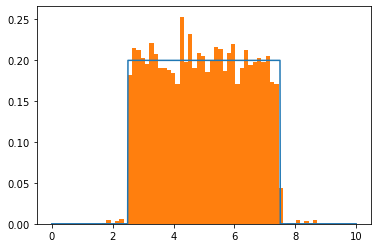

In [24]:
plt.plot(x, tophat/np.trapz(tophat, x=x))
plt.hist(inv2, bins=50,density = True)

In [25]:
# build priors for age, distance, and extinction

In [26]:
observed = pd.read_csv('accdb_updated.csv')
observed.columns

Index(['Simbad-Resolvable Name', 'Source (Original)', 'Alternative Names',
       'Star Forming Region', 'SFR Age (Myr)', 'COORDS', 'Disk Type',
       'Reference', 'Epoch', 'Effective Temperature K', 'Temp err', 'Sp Type',
       'Sp Type Err', 'J Magnitude', 'K Magnitude', 'R Magnitude', 'Method',
       'Wavelength Range', 'Instrument', 'Tracer', 'Accretion Diagnostic',
       'Line Flux erg/s/cm^2', 'Object Luminosity L_solar',
       'Object Luminosity Error', 'Object Radius from L and T',
       'R_err from L and T', 'Object Radius R_solar', 'R_err', 'New Radius',
       'Accretion Rate M_solar yr-1', 'Log Accretion Rate',
       'Object Mass Range M_solar', 'Object Mass M_Solar', 'Object Mass Err',
       'New Mass', 'log object mass', 'Accretion Luminosity (CGS)',
       'Log Accretion Luminosity (solar)', 'Age range Myr', 'System Age Myr',
       'Companion?', 'A_V', 'A_V err', 'A_V source', 'A_J', 'Upper Limit',
       'Notes/Questions2', 'Notes/Questions3', 'Distance'],
    

(array([312.,  51.,   0.,   1.,   2.,   1.,   1.,   1.,   1.,   1.,   2.,
          0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   36.62225608,   381.31295436,   726.00365264,  1070.69435092,
         1415.38504919,  1760.07574747,  2104.76644575,  2449.45714403,
         2794.14784231,  3138.83854059,  3483.52923886,  3828.21993714,
         4172.91063542,  4517.6013337 ,  4862.29203198,  5206.98273026,
         5551.67342853,  5896.36412681,  6241.05482509,  6585.74552337,
         6930.43622165,  7275.12691993,  7619.8176182 ,  7964.50831648,
         8309.19901476,  8653.88971304,  8998.58041132,  9343.2711096 ,
         9687.96180788, 10032.65250615, 10377.34320443, 10722.03390271,
        11066.72460099, 11411.41529927, 11756.10599755, 12100.79669582,
        12

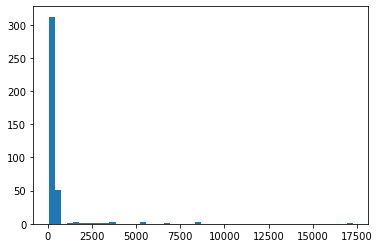

In [27]:
plt.hist(observed['Distance'], bins = 50)

In [28]:
dist = observed['Distance']
x = np.linspace(0,20000,len(dist))
inv_dist = inverse_transform_sampling(x, dist, 500)

In [39]:
dist_func = sinterp.interp1d(x, dist, fill_value='extrapolate')
distance = dist_func(x)
distance

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,  184.9078235 ,
        201.8530106 ,  196.8039046 ,  194.7685176 ,  189.6058095 ,
        188.5440627 ,  184.2401017 ,  190.1610664 ,  187.1362539 ,
        196.8039046 ,  196.8039046 ,           nan,           nan,
                 nan,  196.6336322 ,  179.3239487 ,  179.3239487 ,
                 nan,           nan,           nan,  196.7922857 ,
        179.3239487 ,  179.3239487 ,  193.2404491 ,  196.4829551 ,
        186.570645  ,  193.3076878 ,  194.2313295 ,  193.2852697 ,
        160.3489192 ,           nan,           nan,  204.2233386 ,
        190.3384217 ,  185.0823617 ,  185.0823617 ,  234.9403252 ,
        234.9403252 ,  417.9553624 ,  417.9553624 ,           nan,
                 nan,  321.3264355 ,  321.3264355 ,  321.3264355 ,
                 nan,           nan,  490.4364885 ,  490.4364885 ,
        390.3048281 ,  390.3048281 ,  248.651068  ,           

(array([4.43750782e-03, 4.26310795e-04, 9.68888170e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.93777634e-05, 1.93777634e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.93777634e-05, 0.00000000e+00, 1.93777634e-05,
        0.00000000e+00, 1.93777634e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.93777634e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.93777634e-05,
        0.00000000e+00, 1.93777634e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.93777634e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.93777634e-05]),
 array([  36.62225608,  202.55647762,  368.49069916,  534.4249207 ,
         700.35914223,  86

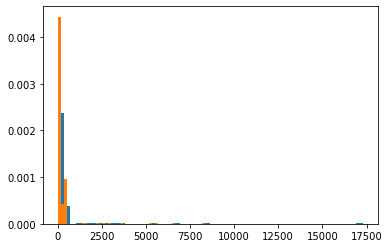

In [40]:
plt.hist(observed['Distance'], bins = 50, density = True)
plt.hist(distance, bins = 50, density = True)
#plt.hist(inv_dist, bins=50, density = True)

(array([40., 12., 13.,  6., 16., 10.,  7., 11.,  3.,  2.,  0.,  0.,  1.,
         1.,  2.,  3.,  6.,  0.,  2.,  3.,  2.,  2.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  0.42,  0.84,  1.26,  1.68,  2.1 ,  2.52,  2.94,  3.36,
         3.78,  4.2 ,  4.62,  5.04,  5.46,  5.88,  6.3 ,  6.72,  7.14,
         7.56,  7.98,  8.4 ,  8.82,  9.24,  9.66, 10.08, 10.5 , 10.92,
        11.34, 11.76, 12.18, 12.6 , 13.02, 13.44, 13.86, 14.28, 14.7 ,
        15.12, 15.54, 15.96, 16.38, 16.8 , 17.22, 17.64, 18.06, 18.48,
        18.9 , 19.32, 19.74, 20.16, 20.58, 21.  ]),
 <BarContainer object of 50 artists>)

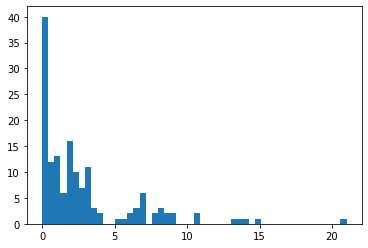

In [85]:
plt.hist(observed['A_V'], bins = 50)

(array([  3.,   2., 253.,   0.,   2.,   0.,  50.,   0.,   2., 166.,   3.,
          1.,   2.,   3.,   3.,   0.,   1.,   4.,   3.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   7.,   0.,   1.,   0.,   0.,   2.,   0.,
          6.,   0.,   0.,   1.,  12.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.12589254,  0.41937469,  0.71285684,  1.00633899,  1.29982114,
         1.59330329,  1.88678544,  2.18026759,  2.47374973,  2.76723188,
         3.06071403,  3.35419618,  3.64767833,  3.94116048,  4.23464263,
         4.52812478,  4.82160693,  5.11508908,  5.40857123,  5.70205338,
         5.99553552,  6.28901767,  6.58249982,  6.87598197,  7.16946412,
         7.46294627,  7.75642842,  8.04991057,  8.34339272,  8.63687487,
         8.93035702,  9.22383917,  9.51732131,  9.81080346, 10.10428561,
        10.39776776, 10.69124991, 10.98473206, 11.27821421, 11.57169636,
        11.86517851, 12.15866066, 12.45214281, 12.74562496, 13.0391071 ,
 

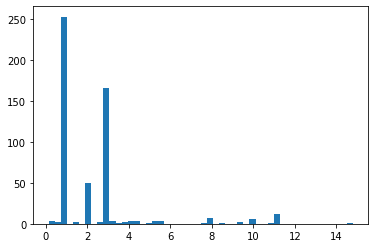

In [86]:
plt.hist(observed['System Age Myr'], bins = 50)

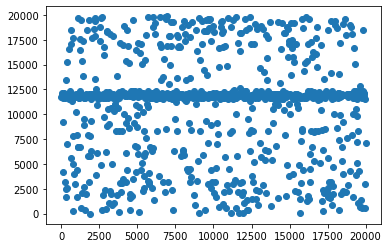

In [127]:
plt.scatter(np.linspace(0,20000,1000), dist_distribution)    #dist.dropna())

In [119]:
#np.linspace(0,20000,len(dist.dropna()))

In [123]:
dist_distribution = inverse_transform_sampling(np.linspace(0,20000,len(dist.dropna())), dist.dropna(), 1000)

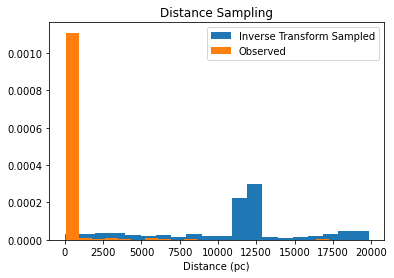

In [124]:
plt.hist(dist_distribution, density=True, bins=20, label='Inverse Transform Sampled')
plt.hist(dist.dropna(), density=True, bins=20, label='Observed')
plt.title("Distance Sampling")
plt.xlabel("Distance (pc)")
plt.legend()

In [208]:
Av = observed['A_V']
#Av.dropna().sort_values(ascending=False)

In [109]:
Av_distribution = inverse_transform_sampling(np.linspace(0,30,len(Av.dropna())), Av.dropna(), 1000)

ValueError: supplied range of [-inf, 26.656715104175216] is not finite

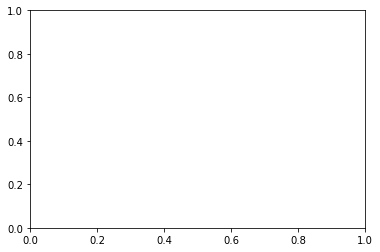

In [110]:
plt.hist(Av_distribution, bins=50, density=True)
plt.hist(Av.dropna(), bins=50, density=True)

## Distance

In [231]:
dist = np.sort(observed['Distance'].dropna())
x = np.linspace(0,20000,len(dist))
dist_func = sinterp.interp1d(x, dist, fill_value='extrapolate')
distance = dist_func(x)

In [232]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=2, kernel='exponential')
dist = dist.reshape((len(dist), 1))
model.fit(dist)

KernelDensity(bandwidth=2, kernel='exponential')

In [233]:
pdf = model.score_samples(x.reshape((len(x), 1)))
pdf = np.exp(pdf)

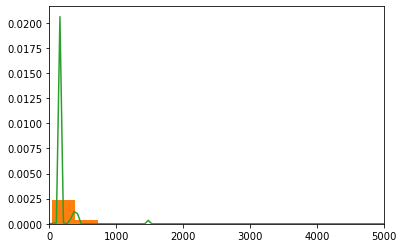

In [235]:
plt.hist(observed['Distance'], bins = 50, density = True)
plt.hist(distance, bins = 50, density = True)
plt.plot(x, pdf)
plt.xlim(0, 5000)
plt.show()

In [237]:
dist_distribution = inverse_transform_sampling(x, pdf, 1000)

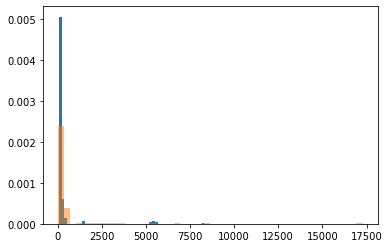

In [251]:
plt.hist(dist_distribution, bins = 50, density = True)
plt.hist(distance, bins = 50, density = True, alpha=0.5)
plt.show()

## Extinction

In [297]:
Av = np.sort(observed['A_V'].dropna())
x = np.linspace(0.2,50,len(Av))
Av_func = sinterp.interp1d(x, Av, fill_value='extrapolate')
A_V = Av_func(x)

In [298]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=2, kernel='exponential')
Av = Av.reshape((len(Av), 1))
model.fit(Av)

KernelDensity(bandwidth=2, kernel='exponential')

In [299]:
pdf = model.score_samples(x.reshape((len(x), 1)))
pdf = np.exp(pdf)

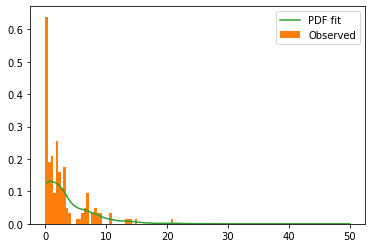

In [300]:
plt.hist(observed['A_V'], bins = 50, density = True)
plt.hist(A_V, bins = 50, density = True, label='Observed')
plt.plot(x, pdf, label='PDF fit')
plt.legend()
plt.show()

In [303]:
observed['A_V'].dropna()

3       3.00
6       0.00
7       1.59
8       0.39
9       0.20
10      0.10
11      0.00
12      0.60
13      0.30
14      0.00
15      1.60
16      0.20
17      0.20
18      0.80
19      0.80
20      0.30
21      0.30
22      0.26
23      0.26
43      1.06
44      1.06
45      2.90
46      2.90
47      5.10
48      2.90
51      2.41
52      1.42
55      1.21
58      3.12
61      0.00
62      0.00
63      0.00
64      1.50
65      1.50
148     8.00
149     9.00
150     3.00
151     8.00
152     3.00
153     7.00
154     7.00
155     8.00
156     8.50
157     2.00
158     7.80
159     6.73
160     6.73
161     7.00
162     6.00
163     6.00
164    10.90
165     9.00
166     3.00
167     3.00
168     2.00
169     3.00
170     3.00
171     8.50
172     2.00
173     7.80
174     3.50
175    21.00
176    13.47
177    13.12
178     0.00
179     6.73
180    14.80
181     3.54
182    14.18
333     3.10
334     3.64
335     3.00
336     1.90
337     2.28
338     1.30
339     2.52
340     5.63

In [293]:
Av_distribution = inverse_transform_sampling(x, pdf, 1000)

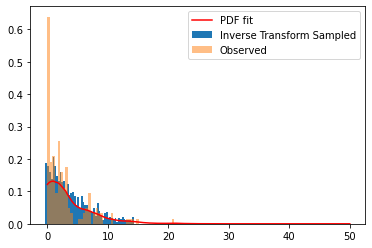

In [294]:
plt.hist(Av_distribution, bins = 50, density = True, label='Inverse Transform Sampled')
plt.hist(A_V, bins = 50, density = True, alpha=0.5, label='Observed')
plt.plot(x, pdf, color='red', label='PDF fit')
plt.legend()
plt.show()

In [202]:
f = A_V
nsamples = 500

(array([87., 33.,  4., 14.,  4.,  2.,  3.,  1.,  0.,  1.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

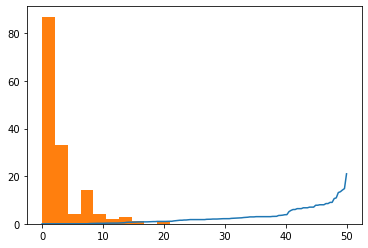

In [203]:
plt.plot(x, f)
plt.hist(f)

In [204]:
dx = x[1]-x[0]
normalized = f / np.trapz(f, x=x, dx=dx)
c = cdf(normalized, dx)
inv = sinterp.interp1d(c, x, fill_value='extrapolate')
r = np.random.rand(nsamples)
samples = inv(r)
samples = samples[np.isfinite(samples)]

(array([0.00249342, 0.00498684, 0.00249342, 0.        , 0.00249342,
        0.00997368, 0.00997368, 0.00498684, 0.00249342, 0.00498684,
        0.00498684, 0.00748026, 0.00997368, 0.00997368, 0.00498684,
        0.01496051, 0.00997368, 0.03740128, 0.01994735, 0.02493419,
        0.01745393, 0.01496051, 0.02244077, 0.00748026, 0.00997368,
        0.01745393, 0.02244077, 0.02244077, 0.01994735, 0.02244077,
        0.01745393, 0.01246709, 0.01994735, 0.04737496, 0.01745393,
        0.01745393, 0.02992103, 0.01994735, 0.02493419, 0.04986838,
        0.03490786, 0.05485522, 0.06233547, 0.04737496, 0.04238812,
        0.05485522, 0.05984205, 0.06233547, 0.10721701, 0.09724334]),
 array([ 9.695644  , 10.49775552, 11.29986703, 12.10197855, 12.90409006,
        13.70620158, 14.50831309, 15.3104246 , 16.11253612, 16.91464763,
        17.71675915, 18.51887066, 19.32098218, 20.12309369, 20.92520521,
        21.72731672, 22.52942824, 23.33153975, 24.13365127, 24.93576278,
        25.7378743 , 26.53

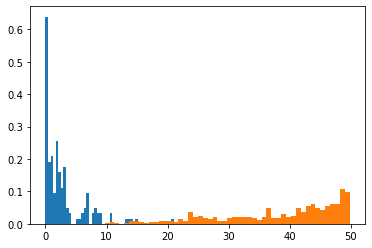

In [205]:
plt.hist(A_V, bins = 50, density = True)
plt.hist(samples, bins = 50, density = True)

## Age

In [207]:
'''
from fitter import Fitter
fitski = Fitter(f)
fitski.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
fitski.summary()
'''

'\nfrom fitter import Fitter\nfitski = Fitter(f)\nfitski.fit()\n# may take some time since by default, all distributions are tried\n# but you call manually provide a smaller set of distributions\nfitski.summary()\n'

In [252]:
age = np.sort(observed['System Age Myr'].dropna())
x = np.linspace(0,12,len(age))
age_func = sinterp.interp1d(x, age, fill_value='extrapolate')
age = age_func(x)

In [256]:
model = KernelDensity(bandwidth=2, kernel='gaussian')
age = age.reshape((len(age), 1))
model.fit(age)

KernelDensity(bandwidth=2)

In [257]:
pdf = model.score_samples(x.reshape((len(x), 1)))
pdf = np.exp(pdf)

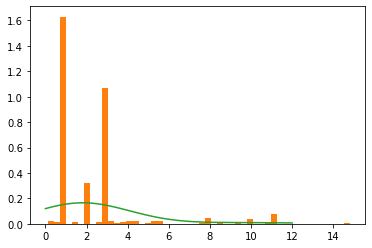

In [258]:
plt.hist(observed['System Age Myr'], bins = 50, density = True)
plt.hist(age, bins = 50, density = True)
plt.plot(x, pdf)

In [259]:
age_distribution = inverse_transform_sampling(x, pdf, 1000)

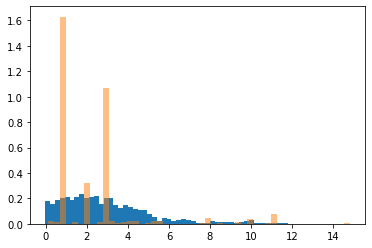

In [260]:
plt.hist(age_distribution, bins = 50, density = True)
plt.hist(age, bins = 50, density = True, alpha=0.5)
plt.show()

In [274]:
from sklearn.neighbors import KernelDensity

def pdf_fit(x, data, kernel='gaussian'):
    '''
    This function fits a probability density function to input data (data) using a non-parametric
    kernel density estimation.
    
    Inputs:
    x (array-like) - range of x-values used to generate the pdf, must cover the range of the data
    data (array-like) - must be in order from least to greatest, and contain no NaN values
    
    Optional:
    kernel (str) - the kernel to use
                {‘gaussian’, ‘tophat’, ‘epanechnikov’, ‘exponential’, ‘linear’, ‘cosine’}, default=’gaussian’
    
    Outputs:
    pdf (array-like) - a fitted probability density function for the histogram of data
    '''
    
    model = KernelDensity(bandwidth=2, kernel=kernel)
    d = data.reshape((len(data), 1))
    model.fit(d)
    
    pdf = model.score_samples(x.reshape((len(x), 1)))
    pdf = np.exp(pdf)
    
    return pdf


In [271]:
p = pdf_fit(x, age, kernel='gaussian')

In [272]:
age_distribution = inverse_transform_sampling(x, p, 1000)